In [1]:
## import some basics libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
## Divide the dataset into independent and dependent features

X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [4]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [5]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [6]:
## Ferature Engineering
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [7]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [8]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [9]:
## concatenate these variables with dataframe
X=X.drop(['Geography','Gender'],axis=1)

In [10]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [11]:
X=pd.concat([X,geography,gender],axis=1)

In [12]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [13]:
#Splitting the dataset into Training set and Test Set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
#feature Scaling

from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [15]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [16]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [17]:
X_train.shape

(8000, 11)

In [18]:
## Part 2 Now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [19]:
### Lets initialize the ANN
classifier=Sequential()

In [20]:
## Adding the input Layer and first hidden layer
classifier.add(Dense(10,input_shape=(11,),activation='relu'))

In [21]:
classifier

In [22]:
# adding the first hidden layer
classifier.add(Dense(units=10,activation='relu'))
#classifier.add(Dropout(0.2))

In [23]:
##adding the second hidden layer
classifier.add(Dense(units=10,activation='relu'))
#classifier.add(Dropout(0.3))

In [24]:
##  Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [25]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 351 (1.37 KB)
Trainable params: 351 (1.37 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [28]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])


In [30]:
# tensorflow.keras.optimizers.rm

In [31]:
## Early Stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5

)

In [32]:
X_train.shape

(8000, 11)

In [33]:
model_history=classifier.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
800/800 [==============================] - 11s 4ms/step - loss: 0.4118 - accuracy: 0.8267 - val_loss: 0.3694 - val_accuracy: 0.8565
Epoch 2/100
800/800 [==============================] - 3s 4ms/step - loss: 0.3604 - accuracy: 0.8530 - val_loss: 0.3505 - val_accuracy: 0.8575
Epoch 3/100
800/800 [==============================] - 3s 4ms/step - loss: 0.3585 - accuracy: 0.8543 - val_loss: 0.3476 - val_accuracy: 0.8635
Epoch 4/100
800/800 [==============================] - 4s 4ms/step - loss: 0.3521 - accuracy: 0.8569 - val_loss: 0.3465 - val_accuracy: 0.8625
Epoch 5/100
800/800 [==============================] - 3s 4ms/step - loss: 0.3518 - accuracy: 0.8568 - val_loss: 0.3452 - val_accuracy: 0.8630
Epoch 6/100
800/800 [==============================] - 3s 4ms/step - loss: 0.3518 - accuracy: 0.8558 - val_loss: 0.3432 - val_accuracy: 0.8635
Epoch 7/100
800/800 [==============================] - 3s 4ms/step - loss: 0.3470 - accuracy: 0.8608 - val_loss: 0.3425 - val_accuracy: 0.865

In [34]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

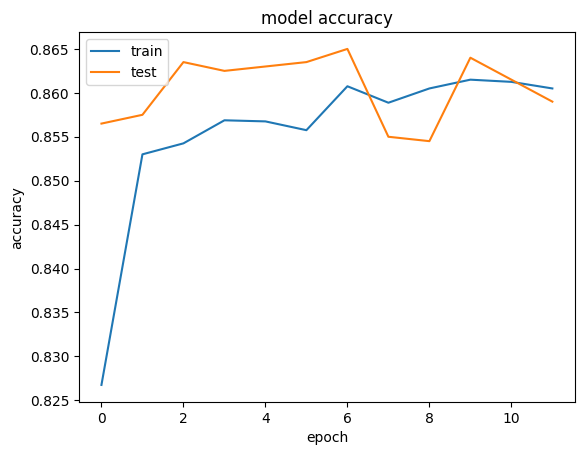

In [35]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

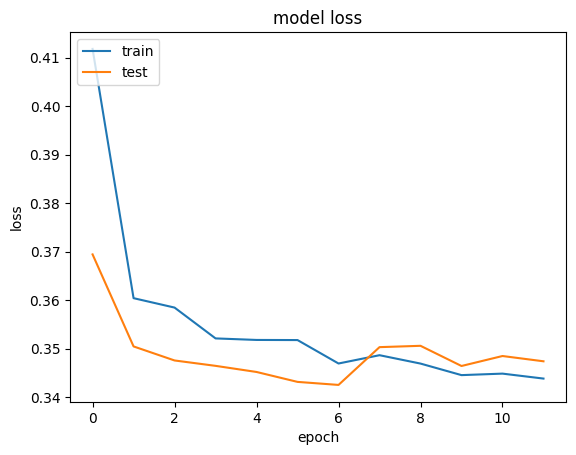

In [36]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 2ms/step


In [38]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1491,  104],
       [ 178,  227]])

In [39]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [40]:
score

0.859

In [41]:
##get the weights
classifier.get_weights()

[array([[-0.0384813 , -0.04105281,  0.9392404 ,  0.5572558 , -0.15523744,
         -0.04969696,  0.21011278,  0.02363753,  0.27856043,  0.7658526 ],
        [ 1.4614854 , -1.7385745 , -0.7128548 , -0.9593069 ,  0.3985846 ,
          1.1251448 ,  1.4023005 , -1.1196276 , -0.15948968, -0.9699334 ],
        [ 0.17124864,  0.01473631,  0.19153364, -0.4925118 ,  0.0475038 ,
          0.7578874 , -0.16820782, -0.10892317, -0.13005422,  0.79444635],
        [-1.3419622 , -0.21211544, -0.22899748,  0.8399291 ,  0.39536557,
         -0.34475026,  0.6215359 , -0.4251838 , -2.1726408 ,  0.71529603],
        [-2.0825875 ,  1.0217776 ,  0.96007425, -0.46302825,  2.5642033 ,
          0.13430616,  1.5099667 ,  0.6429332 ,  0.06657247, -0.06990738],
        [ 0.13437174, -0.3524618 ,  1.3125288 ,  1.0970728 ,  0.12745494,
          0.47317132, -0.10076492, -0.07125974, -0.33014742,  0.16577713],
        [-0.38191235, -0.6184943 ,  0.9601151 ,  1.1918018 , -0.41831097,
          1.4721555 ,  1.5472564

In [42]:
## Saving h5 file
classifier.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [43]:
##laoding h5 file
from tensorflow import keras
classifier1=keras.models.load_model('model.h5')

In [44]:
classifier1.predict(X_test)

63/63 [==============================] - 0s 2ms/step


array([[0.27485436],
       [0.23610057],
       [0.09731577],
       ...,
       [0.06605075],
       [0.13188812],
       [0.1944038 ]], dtype=float32)